<h1 align="center">DIP - Lab 1</h1>

<h2>Imports and General Stuff</h2>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import copy

def displayImage(images, nrows = 1, ncols=1, title=[],image_max=0,plotsize=10):
    #Handle the case of 1 image
    if nrows == 1 and ncols == 1:
        images = [images]
    #Mismatch
    if len(images) != nrows*ncols:
        print("Number of images != number of subplots")
        return
    #Title mismatch
    if len(images) != len(title) and len(title)!=0:
        print("Number of images != number of titles")
        return
    fig = plt.figure(figsize=(plotsize,plotsize))
    ax = []
    for i in range(1, ncols*nrows +1):
        image = images[i-1]
        
        #Deal for various types
        type = image.dtype
        if np.issubdtype(type, np.integer):
            if image_max==0:
                im_max = np.iinfo(type).max
            else:
                im_max=copy.deepcopy(image_max)
        else:
            im_max = 1
        
        plt.gray()
        ax.append( fig.add_subplot(nrows, ncols,i))
        if len(title)!=0:
            ax[-1].set_title(title[i-1])
        plt.axis("off")
        plt.imshow(image,vmin=0,vmax=im_max)
    plt.show()
    
def im2float32(image):
    type = image.dtype
    if np.issubdtype(type, np.integer):
        info = np.iinfo(image.dtype)
        image = image.astype(np.float32) / info.max
    return image

<h2>Questions</h2>

<b>Question 1:</b> Suppose that in a binary image you have $k$ white pixels in a total of $N$ pixels. Find the mean and variance of the
image.
<br>
<br>
Mean would be $\frac{k}{N}$ and variance would be $\frac{k(1-\frac{k}{N})^{2}}{N}$

<b>Question 2:</b> Under what circumstances would you perform a contrast stretching for an image?
<br>
<br>
When the contrast (and hence the variance) is low

<b>Question 3:</b>What is the full dynamic range of an N-bit gray scale image? Implement a transformation that reverses, i.e., 0
becomes L-1, 1 becomes L-2, and so on, the intensity levels of an image (L is the total number of gray levels in
the image). Test your implementation for image ‘pollen’.

The full dynamic range is $2^{N}-1$

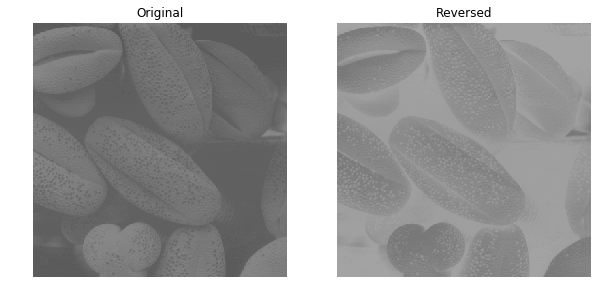

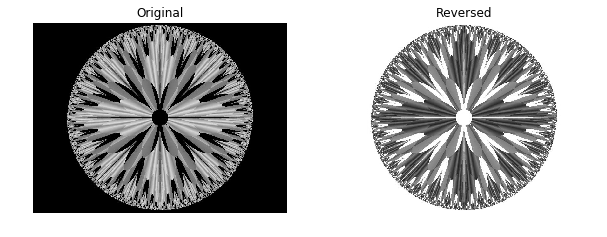

In [25]:
img1 = plt.imread('pollen.png')
iris = plt.imread("fractal-iris.tif")
#Reverses an image
def reverseImage(image):
    type = image.dtype
    if np.issubdtype(type, np.floating):
        return 1-image
    elif np.issubdtype(type, np.integer):
        L = np.iinfo(image.dtype).max
        return L-image
        
    
displayImage([img1,reverseImage(img1)],1,2,title=["Original","Reversed"])
displayImage([iris,reverseImage(iris)],1,2,title=["Original","Reversed"])

<b>Question 4:</b> The image shown in Table 1 has pixels with dynamic range 0 to 15.
<ul>
    <li>Find the brightness of the image and use it to identify two pixels as outliers.
    <li>Dealing with the outliers, apply a contrast stretch to the image.
</ul>
<img src="files/Table 1.png">

[[ 2.5   6.25  8.75  2.5 ]
 [ 3.75  2.5  17.5   6.25]
 [ 7.5   5.   18.75  5.  ]
 [ 8.75  3.75  3.75  7.5 ]]
Pl = -0.125000, Ph = 0.741667
Pixel  1 , 2  is a high outlier
Pixel  2 , 2  is a high outlier


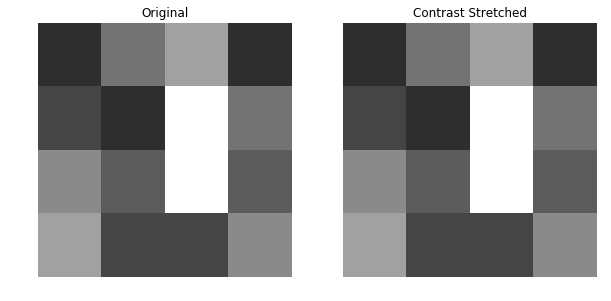

[[ 2.6966293  6.7415733  9.438202   2.6966293]
 [ 4.044944   2.6966293 15.         6.7415733]
 [ 8.089888   5.3932586 15.         5.3932586]
 [ 9.438202   4.044944   4.044944   8.089888 ]]
Variances
0.06359479 vs. 0.06359479


In [26]:
#Finds outliers in an image
def findOutliers(image):
    q1 = np.percentile(image,25)
    q3 = np.percentile(image,75)
    iqr = q3-q1
    pl = q1-1.5*iqr
    ph = q3+1.5*iqr
    print("Pl = %f, Ph = %f" % (pl,ph))
    
    for (x,y),value in np.ndenumerate(image):
        if value<q1-1.5*iqr:
            print("Pixel ",x,",",y," is a low outlier")
        elif value>q3+1.5*iqr:
            print("Pixel ",x,",",y," is a high outlier")
            
#The piecewise function used to perform the contrast stretch (float32 format)
def contrastStretchFunction(x,pl,ph):
    if x<pl:
        return 0
    elif x>ph:
        return 1
    else:
        return (x-pl)/(ph-pl)
            
#Performs a contrast stretch on a float32 image, taking into account the outliers
def contrastStretch(image):
    q1 = np.percentile(image,25)
    q3 = np.percentile(image,75)
    iqr = q3-q1
    pl = q1-1.5*iqr
    ph = q3+1.5*iqr
    if pl<0:
        pl = 0
    if ph>1:
        ph = 1
    
    for (x,y),value in np.ndenumerate(image):
        image[x,y] = contrastStretchFunction(value,pl,ph)
    return image
    

list = [[2,5,7,2],[3,2,14,5],[6,4,15,4],[7,3,3,6]]
img2 = np.array(list)
print((15/12)*img2)
img2 = img2.astype(np.float32) / 15  #Scale to a float32
findOutliers(img2)
displayImage([img2,contrastStretch(img2)],1,2,title=["Original","Contrast Stretched"])
print(contrastStretch(img2)*15)
print("Variances")
print(np.var(img2),"vs.",np.var(contrastStretch(img2)))

<b>Question 5:</b> Perform contrast stretching for images ‘pollen’, ‘aerial_washedout’, ‘skeleton’, and ‘fractured_spine’.

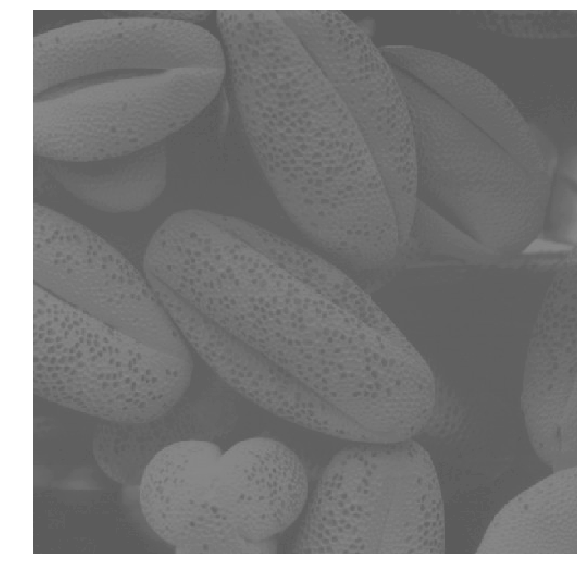

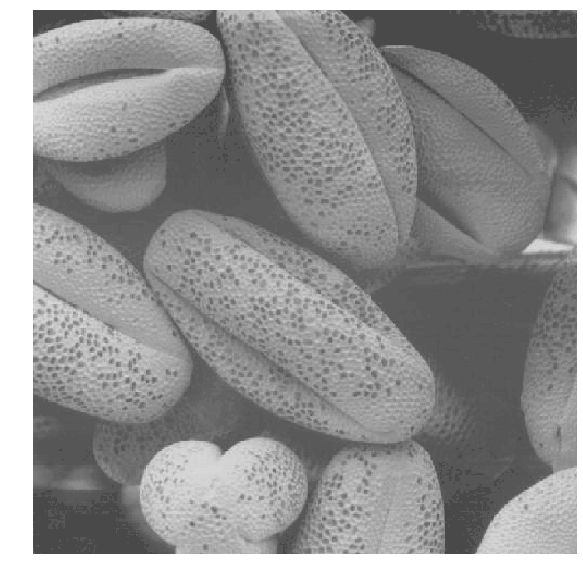

In [27]:
displayImage(plt.imread('pollen.png'))
displayImage(contrastStretch(plt.imread('pollen.png')))

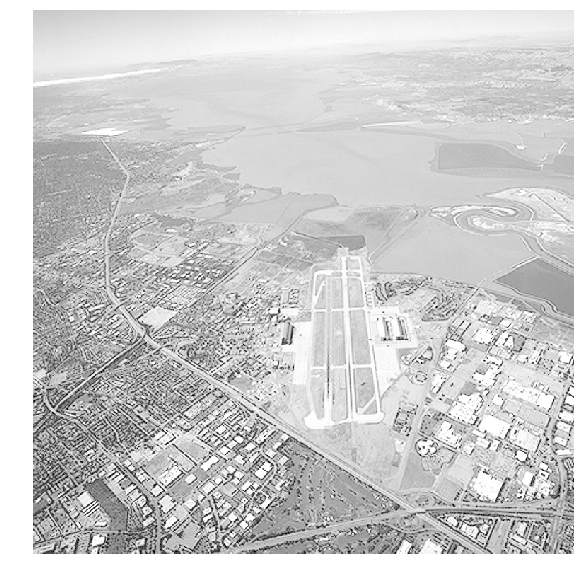

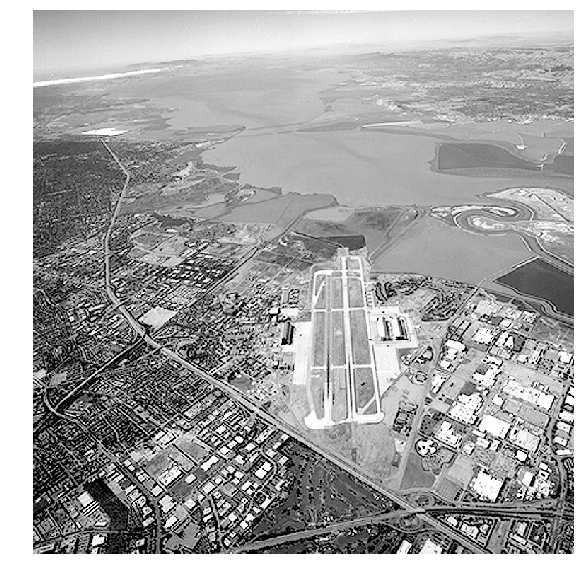

In [28]:
displayImage(plt.imread('aerial_washedout.png'))
displayImage(contrastStretch(plt.imread('aerial_washedout.png')))

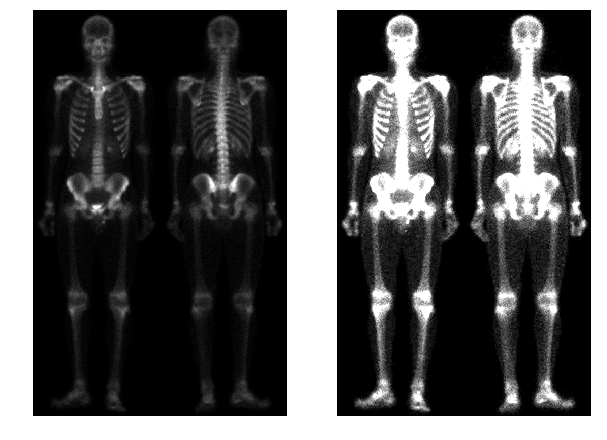

In [29]:
skeleton = plt.imread('skeleton.tif').astype(np.float32)/255
displayImage([skeleton,contrastStretch(copy.deepcopy(skeleton))],1,2)

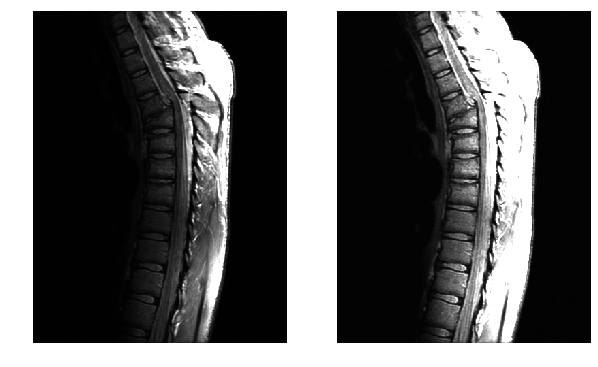

In [30]:
spine = plt.imread('fractured_spine.tif').astype(np.float32)/255
displayImage([spine,contrastStretch(copy.deepcopy(spine))],1,2)

<b>Question 6:</b> Highlighting a specific range of gray levels in an image is often desired. Applications include enhancing features
such as masses of water in satellite imagery and enhancing flaws in X-ray images. Two approaches often serve as
the basic themes.
<ul>
    <li>Display a high value for all gray levels in the range of interest and a low value for all other gray levels.
    <li>Brightens the desired range of gray levels but preserves the background and gray-level tones in the image.
</ul>
Implement the above two approaches using two transformation functions illustrated in Fig. 1. Test your implementation
on image ‘kidney’ using different highlighting ranges.
<img src="files/Figure 1.png">

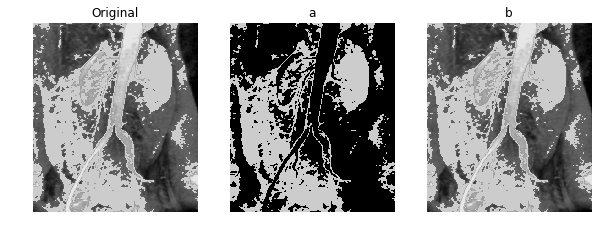

In [31]:
upper = 0.6
lower = 0.4

#Highlight mid but preserve everything else
def highlightPreserving(image):
    for (x,y),value in np.ndenumerate(image):
        if value<upper and value>lower:
            image[x,y] = 0.8
    return image

#Highlight middle range and blacken everything else
def highlightReducing(image):
    for (x,y),value in np.ndenumerate(image):
        if value<upper and value>lower:
            image[x,y] = 0.8
        else:
            image[x,y] = 0
    return image

kidney = im2float32(plt.imread("kidney.tif"))
kidney1 = highlightReducing(kidney)
kidney = im2float32(plt.imread("kidney.tif"))
kidney2 = highlightPreserving(kidney)
displayImage([kidney,kidney1,kidney2],1,3,title=["Original","a","b"])

<b>Question 7: </b>Implement a bit-plane slicing transformation that capable of producing all the individual bit planes of an 8-bit
monochrome image. (For example, a transformation function with the property T(r)=0 for r in the range [0;127],
and T(r) = 255 for r in the range [128;255] produces an image of the 7th bit plane in an 8-bit image.) Test your
implementation for image ‘fractal-iris.tif’.

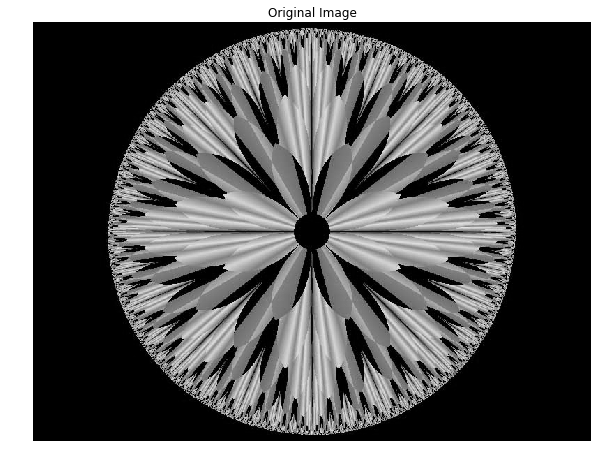

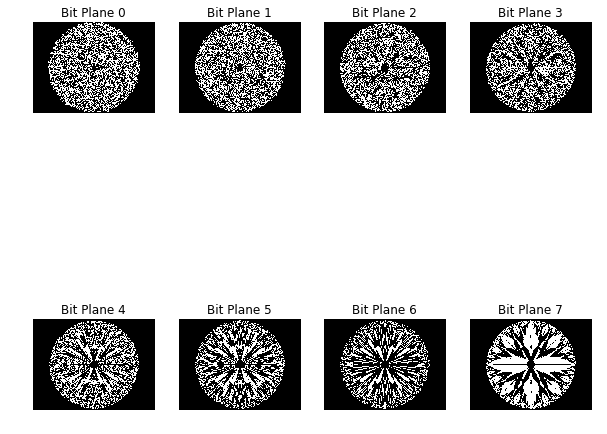

In [37]:
iris = plt.imread("fractal-iris.tif")
displayImage(iris,title=["Original Image"])

#Only works for integer types
def bitSlice(image,bit):
    newImage = np.zeros(image.shape)
    im_max = np.iinfo(image.dtype).max
    N = int(np.log2(im_max+1))
    if bit<0 or bit>=N:
        print("Invalid bit")
        return
    flip = N-1-bit
    for (x,y),value in np.ndenumerate(image):
        binary = np.binary_repr(value,N)
        relevantBit = int(binary[flip])
        newImage[x,y] = relevantBit*(2**bit)
    return newImage
        
images = []
titles = []
for i in range(8):
    images.append(bitSlice(iris,i))
    titles.append("Bit Plane "+str(i))
displayImage(images,2,4,titles)